In [1]:
import sys
sys.path.append('../../build')
sys.path.append('../')
import IPSModule as ips
import helpers as hp
from utils import SimulationVisualizer
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import lattpy as lp

In [2]:
import importlib
importlib.reload(hp)

<module 'helpers' from '/home/markalvaress/IPS/scripts/stability_analysis/helpers.py'>

In [3]:
def initialise_langevin_simulator(gamma = 1, temperature = 0.2, rad = 15.0, epsilon = 1.0, sigma = 1.0):
    # Set up 2 particle system, with particles sitting just at the boundary
    init_dis = 2 ** (1.0 / 6.0) * sigma

    num_particles = 2
    init_particles_positions = np.array([[0, 0], [init_dis, 0]])
    particles = ips.LangevinSystem(num_particles, gamma, temperature)

    # set the initial positions in our system
    for i in range(num_particles):
        for d in range(2):
            particles.get_positions()[d][i] = init_particles_positions[i][d]
            particles.get_velocities()[d][i] = 0.0

    pair_force_config = {
        "type": "LennardJones",
        "eps": epsilon,
        "sigma": sigma
    }

    confinement_config = {
        "type": "Radial",
        "rad": rad
    }
    simulator = ips.IPS_Simulator_Langevin(particles)
    simulator.init(pair_force_config, confinement_config)

    return particles, simulator

In [4]:
def langevin_integrator(h, n_steps, sigma):
    particles, simulator = initialise_langevin_simulator(sigma=sigma)
    simulator.integrate_n_steps(h, n_steps)
    final_positions = particles.get_positions()
    trajects = [np.array([final_position]) for final_position in final_positions]
    return trajects

In [18]:
sigmas = np.linspace(0.1, 2, 10)

In [19]:
thresholds = [None] * len(sigmas)
for i, sigma in enumerate(sigmas):
    print(f"{sigma=}")
    integrator = lambda h, n_steps: langevin_integrator(h, n_steps, sigma)
    thresholds[i] = hp.get_stability_threshold(integrator, h_init=1, n_integration_steps = 100000, verbose = False)

sigma=0.1
Step 1: big jumps
Unstable, trying h=0.5
Unstable, trying h=0.25
Unstable, trying h=0.125
Step 1 complete, h_l=0.125, h_r=0.25
h_mid=0.1875, stable
h_mid=0.21875, stable
h_mid=0.234375, unstable
h_mid=0.2265625, unstable
h_mid=0.22265625, unstable
h_mid=0.220703125, unstable
h_mid=0.2197265625, unstable
h_mid=0.21923828125, unstable
h_mid=0.218994140625, unstable
h_mid=0.2188720703125, unstable
h_mid=0.21881103515625, unstable
h_mid=0.218780517578125, unstable
h_mid=0.2187652587890625, unstable
h_mid=0.21875762939453125, unstable
h_mid=0.21875381469726562, unstable
h_mid=0.2187519073486328, unstable
h_mid=0.2187509536743164, unstable
h_mid=0.2187504768371582, unstable
h_mid=0.2187502384185791, unstable
h_mid=0.21875011920928955, unstable
sigma=0.3111111111111111
Step 1: big jumps
Unstable, trying h=0.5
Unstable, trying h=0.25
Unstable, trying h=0.125
Unstable, trying h=0.0625
Unstable, trying h=0.03125
Step 1 complete, h_l=0.03125, h_r=0.0625
h_mid=0.046875, unstable
h_mid=0.

In [22]:
def V(r, eps, sigma):
    return 4*eps*((sigma/r)**12-(sigma/r)**6)

def V_prime(r, eps, sigma):
    return 4*eps*(-12*(sigma)**12*r**(-13) + 6*sigma**6*r**(-7))

def v_pprime(r, eps, sigma):
    return 4*eps*(156*sigma**12*r**(-14) - 42*sigma**6*r^(-8))

def v_pprime_atmin(eps, sigma):
    return 4*eps/(sigma**2)*(2**(-7/3)*156 - 2**(-4/3)*42)

In [ ]:
def derivative(f, x):
    # centred difference
    h = 1e-5
    return (f(x+h)-f(x-h))/(2*h)

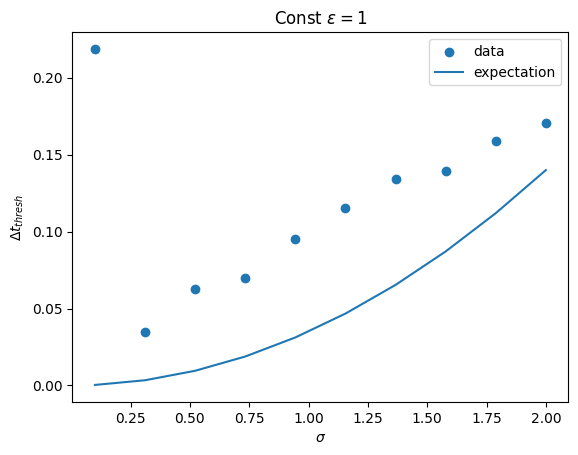

In [20]:
plt.scatter(sigmas, thresholds, label = "data")

pred_freqs = np.array([v_pprime_atmin(1, sigma) for sigma in sigmas])
plt.plot(sigmas, 2/pred_freqs, label = "expectation")
plt.xlabel("$\sigma$")
plt.ylabel(r"$\Delta t_{thresh}$")
plt.legend()
plt.title("Const $\epsilon = 1$")
plt.show()